### 1.暴力解

In [ ]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]

In [29]:
water = 0
start = 0
while sum(height)>1:
    temp = 0
    for i in range(start,len(height)):
        temp += height[i]
        if temp!=0:
            idx,start = i,i
            break
    
    temp = 0        
    while idx<=len(height)-2:
        if height[idx+1]==0:
            temp+=1
        if height[idx+1]!=0:
            water+=temp
            temp = 0
        idx+=1
        
    height = [max(0,x-1) for x in height]

water

6

### 2.Two Pointer

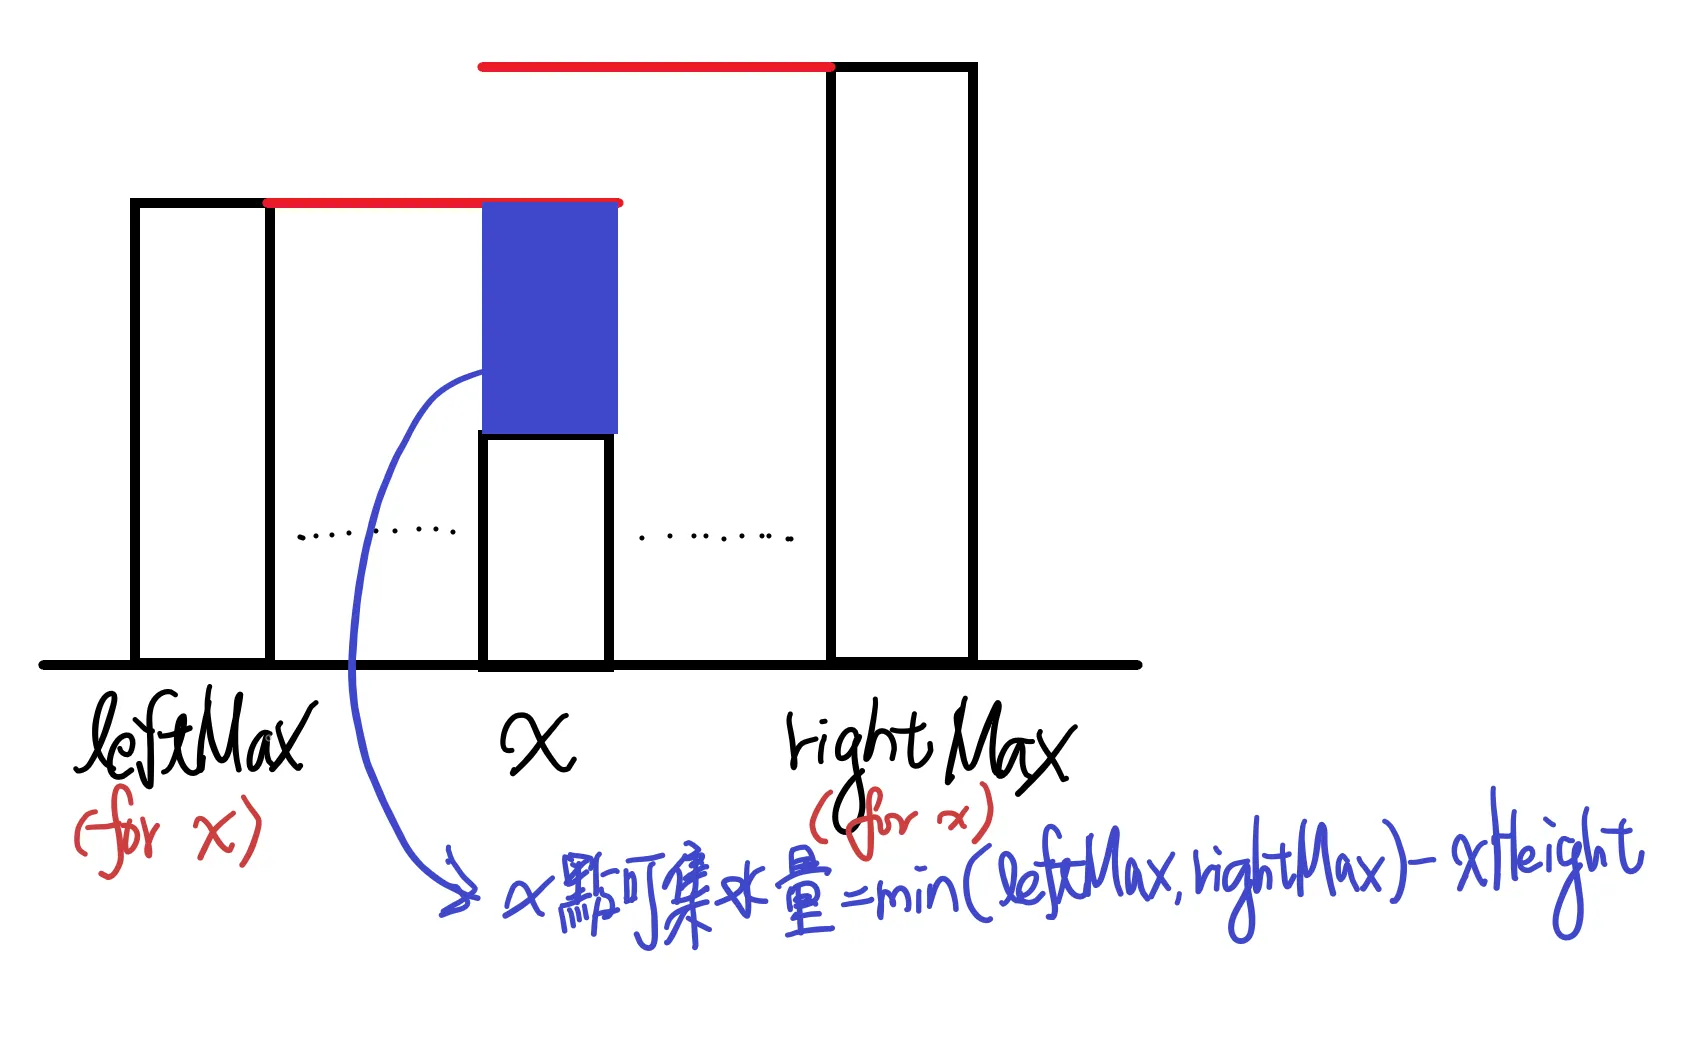

資料來源：https://knightzone.studio/2019/04/09/4216/leetcode%EF%BC%9A42-trapping-rain-water/

In [45]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]

In [47]:
l = 0
r = len(height)-1
max_l = 0
max_r = 0
water = 0

while l<r:
    max_l = max(max_l, height[l])
    max_r = max(max_r, height[r])
    '''
    每一輪從較小的那一邊切入，因較大的那一邊一定能成為他的一個邊界，而另一邊則取該邊當前最大值作為邊界，
    因此該位子i可獲取之最大容量為 max - height[i]
    '''
    if height[l]<height[r]:
        water += max_l - height[l]
        l+=1
    elif height[r]<height[l]:
        water += max_r - height[r]
        r-=1
    else:
        l+=1

### 3.DP

In [34]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]

In [56]:
left = [0]*len(height)
right = [0]*len(height)

#每個點往左邊看的最大高度
for i in range(1,len(height)):
    left[i] = max(left[i-1], height[i-1])

#每個點往右邊看的最大高度
for i in range(len(height)-2,-1,-1):
    right[i] = max(right[i+1], height[i+1])

#在該點能裝的水的最大高度(就是取往左及往右看較小的那個)
min_height = [min(x,y) for x,y in zip(left,right)]

#若height<min_height，表示可以裝水，水量為min_height[i]-height[i]
water = 0
for i in range(len(height)):
    if height[i]<min_height[i]:
        water+=min_height[i]-height[i]
        
water

6